# Исследование объявлений о продаже квартир

**Цель исследования** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Ход исследования**

Архивные данные объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет мы получили из файла `/datasets/real_estate_data.csv`. Данные содержат два типа данных: добавленные пользователем и картографические.

Исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных: изучим пропуски, проверим типы данных, устраним неявные дубликаты, а также редкие и выбивающиеся значения.
 3. Добавление новых столбцов в таблицу.
 4. Исследовательский анализ данных.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца. В столбцах присутствуют различные типы данных — object, bool, float64, int64.

Согласно документации к данным:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

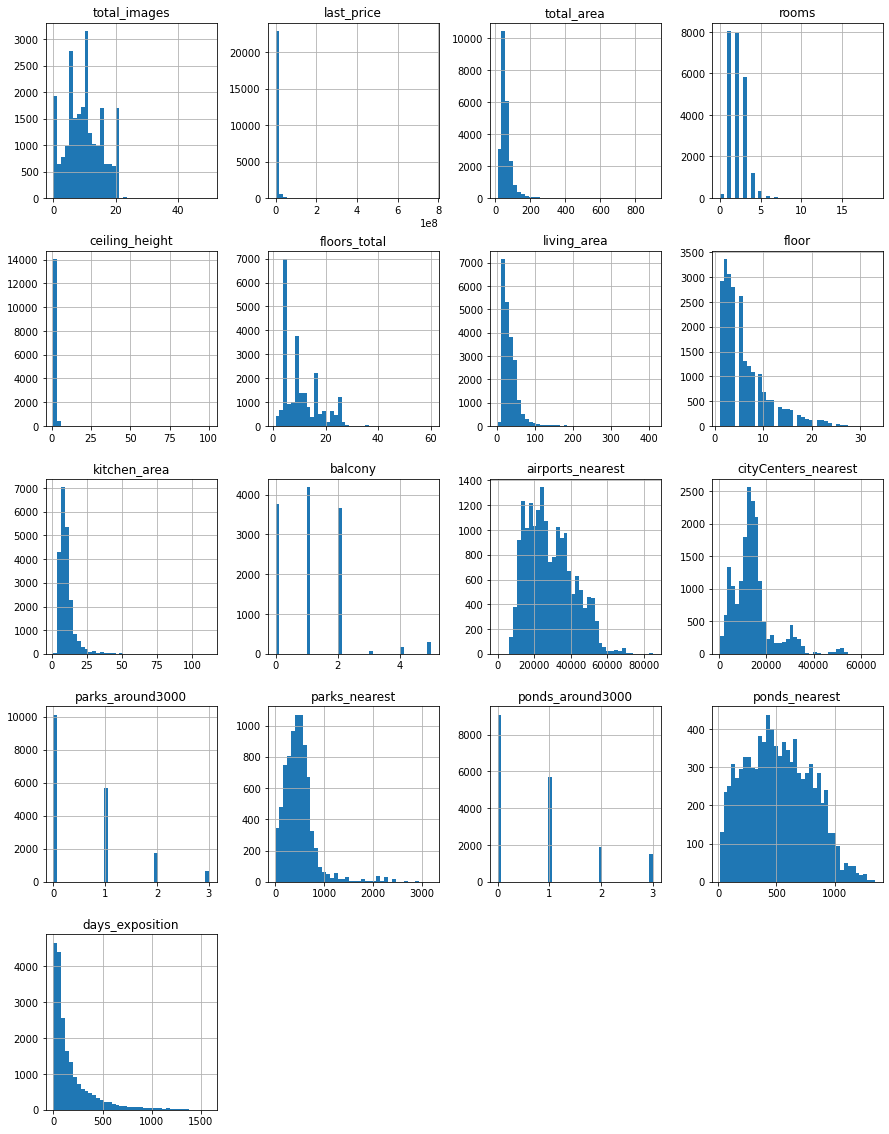

In [5]:
#построим общую гистограмму для всех столбцов таблицы
data.hist(bins=40, figsize=(15, 20));

Данные гистограммы будем использовать в дальнейшем исследовании при выявлении аномалий.

### Предобработка данных

#### Обработка пропусков

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Данные пропущены в большинстве столбцов. Пройдемся последовательно по каждому столбцу и заполним пропуски там, где это возможно и необходимо для дальнейшего корректного анализа.

In [7]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [8]:
#найдем медианное значение высоты потолков и заполним им пропуски в этом столбце
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [9]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [10]:
#заменим пропуски в столбце floors_total максимальным значением этажа объекта
data['floors_total']= data['floors_total'].where(data['floors_total']>=data['floor'], data['floor'])
data['floors_total'].describe()

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [11]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [12]:
#сгруппируем стобец living_area по количеству комнат и заполним пропуски медианным значением для каждой группы
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()
    
data['living_area'].describe()

count    23699.000000
mean        34.321982
std         21.700627
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

In [13]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [14]:
#заполним пропуски в студиях значением "0", а в остальных объектах медианным значением в зависимости от количества комнат
data.loc[(data['studio'] == 1) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area'].median()
    
data['kitchen_area'].describe()

count    23699.000000
mean        10.371929
std          5.724779
min          0.000000
25%          7.200000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

Количество пропусков в столбце locality_name крайне мало, они не повлияют на ход дальнейшего исследования.

Информация об отношении объекта недвижимости к апартаментам и наличии балкона не является ключевой в нашем исследовании, поэтому эти столбцы трогать не будем.

Пропуски в картографических данных заполним значением "0".

In [15]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5518
parks_nearest               0
ponds_around3000         5518
ponds_nearest               0
days_exposition          3181
dtype: int64

Пропуски могли возникнуть по нескольким причинам. В выгрузке картографических данных могли быть сбои или ошибки. Также стоит учесть человеческий фактор - пользователи могли не заполнить какие-то данные случайно или намеренно.

#### Обработка типов данных

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Информация о дате публикации записана в формате строки, заменим тип данных на datetime и оставим в записи только дату.

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D')

Переименуем столбец cityCenters_nearest, приведя его к нижнему регистру.

In [18]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

#### Удаление неявных дубликатов

Изучим значения в столбце с названиями населенных пунктов.

In [19]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [20]:
data['locality_name'].nunique()

364

Список наименований состоит из 364 значений. В первую очередь заметны следующие дубликаты: "поселок" и "посёлок", "поселок городского типа" и "городской поселок". Осуществим замены.

In [21]:
data = data.reset_index(drop=True)
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'пгт')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'пгт')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'снт')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'снт')

data['locality_name'].nunique()

323

После устранения неявных дубликатов в списке осталось 323 уникальных названия

#### Устранение редких и выбивающихся значений

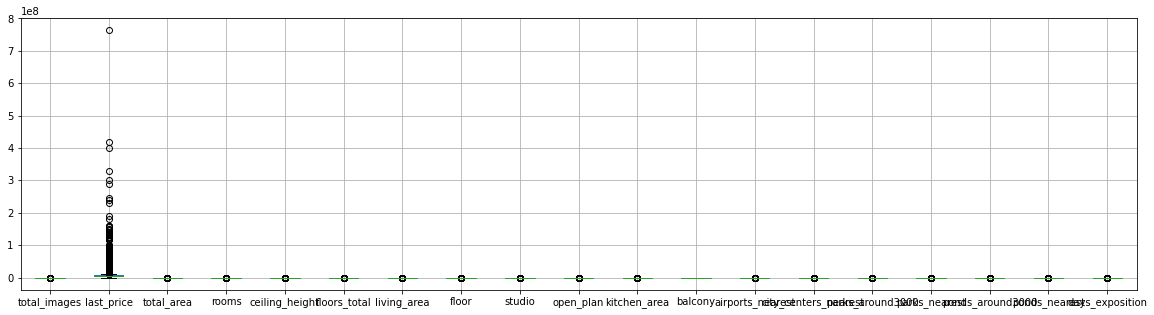

In [22]:
#посмотрим на общую диаграмму размаха по столбцам
data.boxplot(figsize=(20,5));

В первую очередь выделяются выбросы в столбце last_price. Поэтому начнем обратботку выбивающихся значений с него.

In [23]:
#посмотрим на характерные значения столбца
#для удобства переведем суммы в миллионы
last_price_mln = data['last_price']/1000000
data['last_price'] = last_price_mln
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

Макисмальное значение почти в 200 раз больше медианы. Примем верхнюю границу в 10 млн и посмотрим на график.

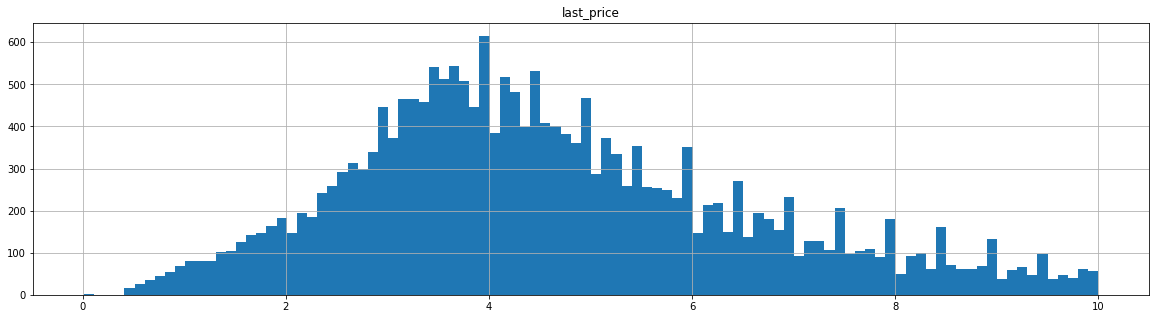

In [24]:
(
data
.query('last_price<10')
.hist('last_price', bins=100, figsize=(20,5))
);

На графике появилось нормальное распределение. Создадим новую переменную, в которой сохраним данный срез.

In [25]:
data_cut = data.query('last_price<10')

In [26]:
#изучим данные в столбце total_area
data_cut['total_area'].describe()

count    20917.000000
mean        52.018624
std         17.724700
min         12.000000
25%         38.600000
50%         48.000000
75%         62.000000
max        201.500000
Name: total_area, dtype: float64

Максимальное значение вновь значительно выбивается из общей массы. Примем верхнюю границу общей площади объекта в 100 м2. но перед этим проверим распределение значений в многокомнатных квартирах с 3мя и более комнатами.

In [27]:
data_cut.query('rooms>=3')['total_area'].describe()

count    5380.000000
mean       72.230467
std        15.827483
min        40.000000
25%        60.300000
50%        70.200000
75%        80.000000
max       201.500000
Name: total_area, dtype: float64

Медианное значение составляет 70 м2. Отсекая данные об объектах площадью более 100 м2, мы не навредим основной массе данных.

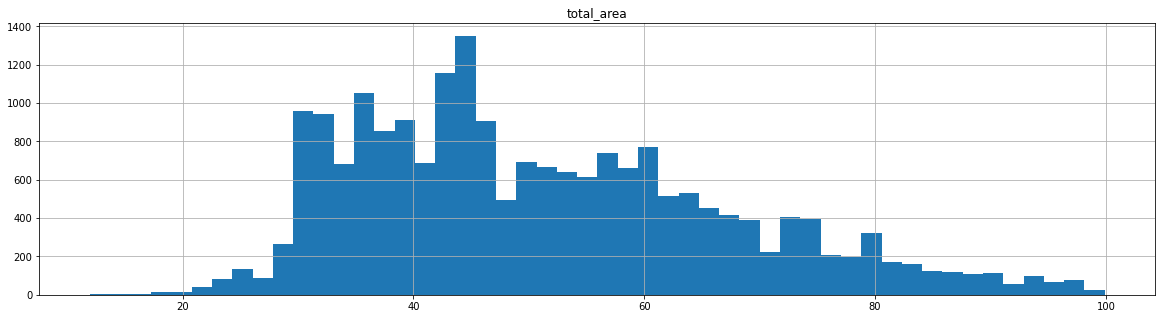

In [28]:
data_cut = data_cut.query('total_area<100')
data_cut.hist('total_area', bins=50, figsize=(20,5));


In [29]:
#изучим данные в столбце ceiling_height
data_cut['ceiling_height'].describe()

count    20616.000000
mean         2.690968
std          0.798990
min          1.000000
25%          2.600000
50%          2.650000
75%          2.650000
max         32.000000
Name: ceiling_height, dtype: float64

Максимальная высота потолка 32м, это примерно 10-этажный дом. Посмотрим подробнее на список значений.

In [30]:
data_cut['ceiling_height'].unique()

array([ 2.65,  2.5 ,  2.67,  2.56,  3.05,  2.7 ,  2.75,  2.6 ,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.61,  3.2 ,  3.25,  3.45,  2.77,  2.64,
        2.57,  4.15,  2.47,  2.73,  2.84,  2.34,  3.4 ,  2.72,  2.54,
        2.51,  2.78,  2.76,  3.1 , 25.  ,  2.58,  2.52,  3.5 ,  2.66,
        2.59,  2.  ,  2.85,  3.3 ,  2.45,  2.92,  3.13,  3.15,  3.62,
        3.12,  2.53,  2.46,  3.8 ,  2.74,  5.  ,  2.79,  3.55,  2.95,
        4.06,  2.94,  3.7 ,  2.83,  2.4 ,  3.38,  3.01,  3.65,  2.71,
        2.3 ,  2.48,  2.62,  3.57,  2.82,  3.98,  2.63,  3.83,  2.88,
        4.19,  4.  ,  4.5 ,  3.75,  3.35, 32.  ,  3.07,  3.37,  3.09,
        8.  ,  3.16,  3.34,  2.81,  3.44,  4.37,  2.68, 27.  ,  4.1 ,
        3.95,  3.46, 24.  ,  3.27,  3.47,  3.9 ,  3.33,  3.63,  3.32,
       26.  ,  1.2 ,  3.18,  8.3 ,  2.93,  2.86,  3.08,  4.2 ,  3.17,
        3.11,  3.67,  3.28,  3.04,  3.23,  3.02,  3.6 ,  3.21,  2.96,
        2.87,  3.54,  4.3 ,  3.06,  2.69,  3.22,  3.03,  5.3 ,  2.2 ,
        3.85,  3.42,

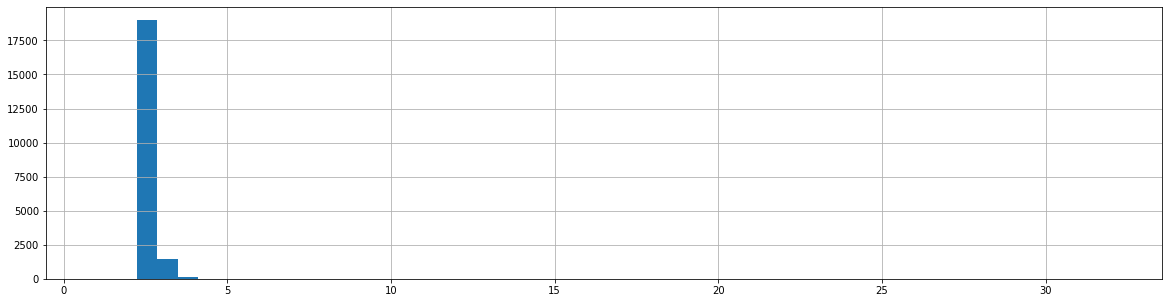

In [31]:
data_cut['ceiling_height'].hist(bins=50, figsize=(20,5));

Скорее всего двухзначная высота изначально была дробным числом, но по какой-то причине разделитель-точка "съехала". Т.к. таких значений немного, можем исключить их из исследования. Вызывают вопрос объекты с 8-метровыми потолками и со значением "1" при допустимой норме в 2,4м. 

Для нашего исследования оставим объекты с потолками от 2 до 5 метров.

In [32]:
data_cut = data_cut.query('2<ceiling_height<4')

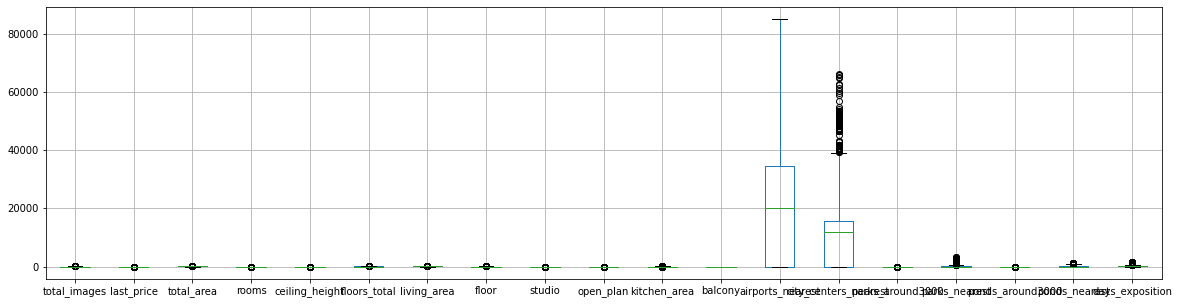

In [33]:
#посмотрим еще раз на общую диаграмму размаха по столбцам
data_cut.boxplot(figsize=(20,5));

Теперь выбиваются столбцы с расстоянием до ближайшего аэропорта и до центра города. Рассмотрим их подробнее.

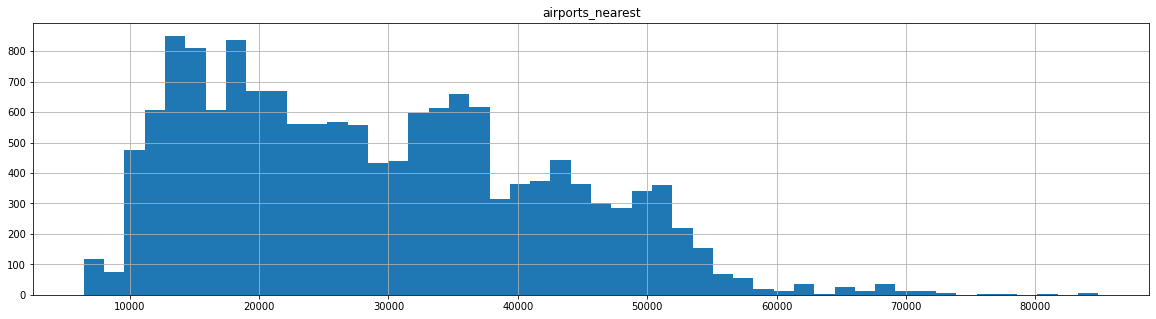

In [34]:
#изучим данные в столбце airports_nearest
#т.к. мы заменили пропуски на "0", возьмем срез от "1"
data_cut.query('airports_nearest>1').hist('airports_nearest', bins=50, figsize=(20,5));

Признаем объекты дальше 60 км от аэропорта статистическими выбросами. Радиус 60 км включает в себя не только весь город, но и ближайший пригород.

In [35]:
data_cut = data_cut.query('airports_nearest<60000')

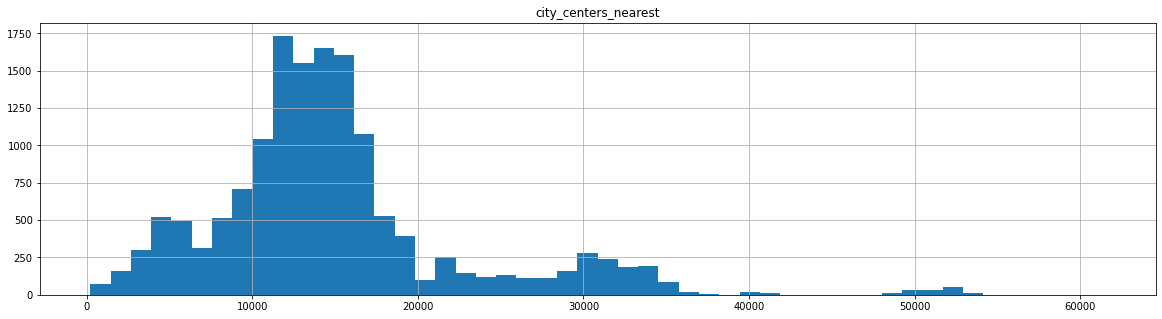

In [36]:
#изучим данные в столбце city_centers_nearest
#т.к. мы заменили пропуски на "0", возьмем срез от "1"
data_cut.query('city_centers_nearest>1').hist('city_centers_nearest', bins=50, figsize=(20,5));

Признаем объекты дальше 35 км от центра города статистическими выбросами.

In [37]:
data_cut = data_cut.query('city_centers_nearest<35000')

Для нашего исследования также важна площадь кухни. Изучим подробно столбец с данной характеристикой.

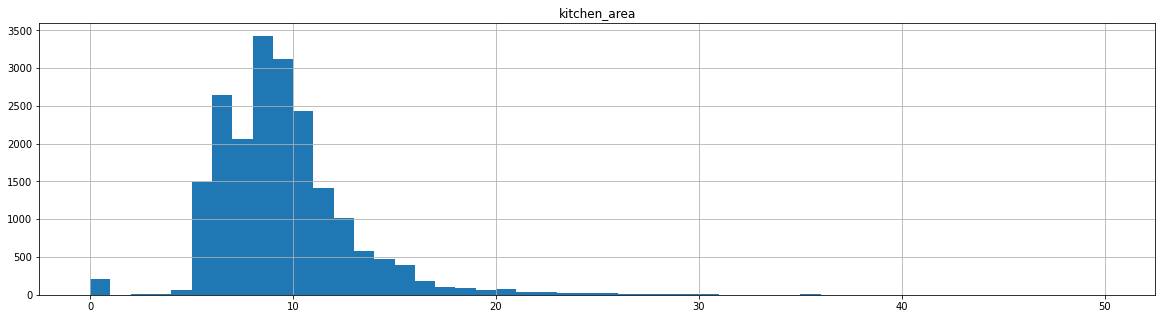

In [38]:
#изучим данные в столбце kitchen_area
data_cut.hist('kitchen_area', bins=50, figsize=(20,5));

На графике выделяется выброс на отметке "0". Предположим, что нулевой считается площадь кухни в студиях, поэтому удалять их не будем. Но с другой стороны графика присутствуют отдельные значения выше 20 м2, посчитаем их выбросами и избавимся от них.

In [39]:
data_cut = data_cut.query('kitchen_area<20')

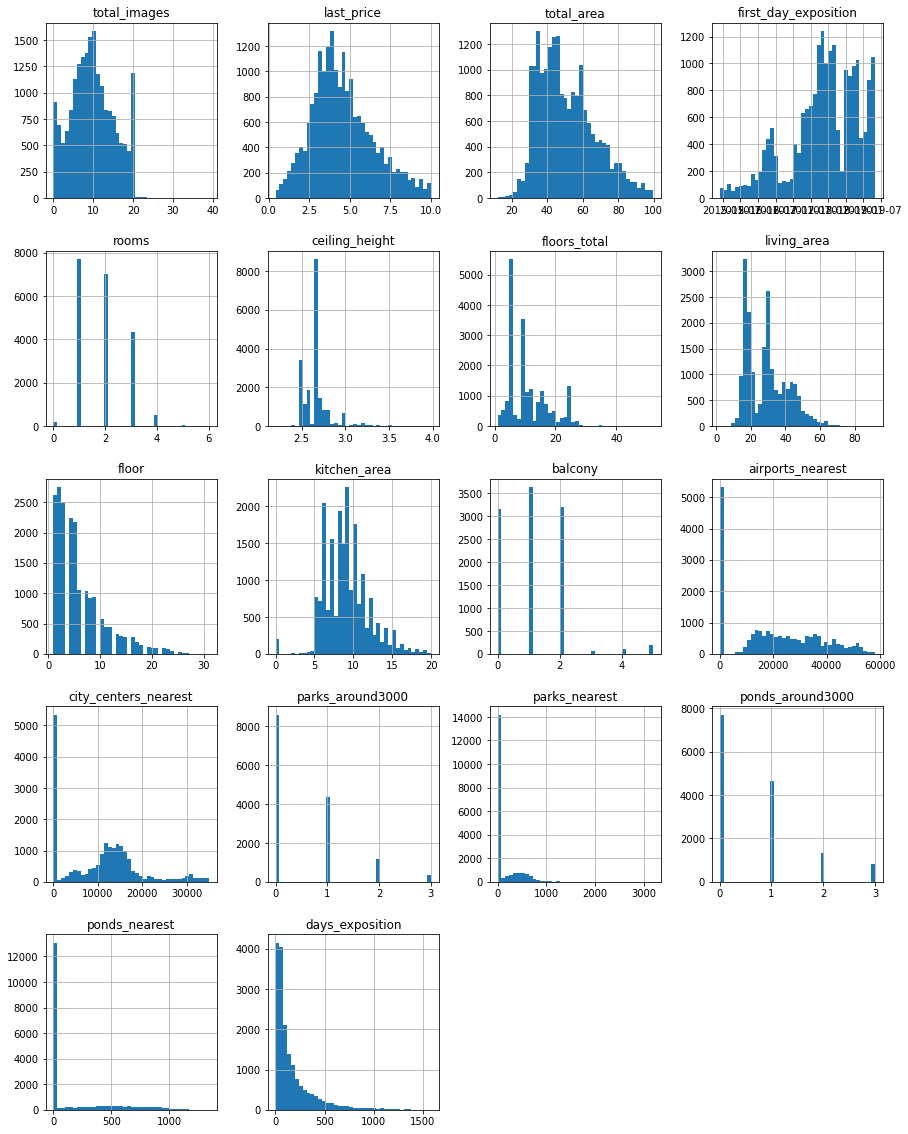

In [40]:
#построим снова общую гистограмму для всех столбцов таблицы
data_cut.hist(bins=40, figsize=(15, 20));

После устранения редких значений на графиках появилось нормальное распределение.

### Посчитайте и добавьте в таблицу новые столбцы

In [41]:
#добавим столбец с ценой одного квадратного метра
data_cut['one_mtr_price'] = data_cut['total_area']/data_cut['last_price']

In [42]:
#добавим столбец с днем недели публикации, где 0 - понедельник
data_cut['week_day'] = data_cut['first_day_exposition'].dt.weekday

In [43]:
#добавим столбец с месяцем публикации объявления
data_cut['month'] = data_cut['first_day_exposition'].dt.month

In [44]:
#добавим столбец с годом публикации
data_cut['year'] = data_cut['first_day_exposition'].dt.year

In [45]:
#добавим столбец с типом этажа квартиры - первый, последний или другой
def floor_cat (row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data_cut['floor_category'] = data_cut.apply(floor_cat, axis=1)

In [46]:
#добавим столбец с расстоянием до центра города в километрах
data_cut['city_center_km'] = round(data_cut['city_centers_nearest']/1000, 0)
data_cut['city_center_km'] = data_cut['city_center_km'].astype(int)

In [47]:
data_cut.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_mtr_price,week_day,month,year,floor_category,city_center_km
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,0.0,0.0,0.0,81.0,12.059701,1,12,2018,первый,19
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,90.0,2.0,574.0,558.0,10.777521,3,8,2015,другой,14
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,0.0,NaN,0.0,55.0,10.519031,0,9,2018,другой,0
6,6,3.700,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,0.0,0.0,0.0,155.0,10.081081,3,11,2017,другой,19
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,30.50,22,NaN,...,0.0,0.0,0.0,NaN,9.046115,3,4,2019,другой,12
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,0.0,NaN,0.0,189.0,11.434483,2,5,2018,другой,0
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0.0,0.0,0.0,289.0,11.296296,6,2,2017,другой,15
10,5,5.050,39.60,2017-11-16,1,2.67,12.0,20.30,3,NaN,...,310.0,2.0,553.0,137.0,7.841584,3,11,2017,другой,14
12,10,3.890,54.00,2016-06-30,2,2.65,5.0,30.00,5,NaN,...,0.0,NaN,0.0,90.0,13.881748,3,6,2016,последний,0
13,20,3.550,42.80,2017-07-01,2,2.56,5.0,27.00,5,NaN,...,294.0,3.0,298.0,366.0,12.056338,5,7,2017,последний,33


### Проведите исследовательский анализ данных

#### Изучение основных параметров объектов

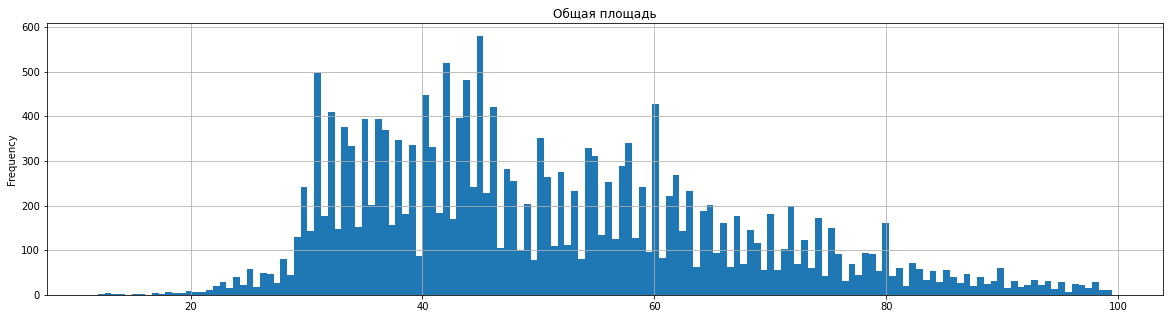

In [48]:
#исследуем данные в столбце total_area
data_cut['total_area'].plot(title='Общая площадь', 
                            kind='hist', 
                            grid=True, 
                            bins=150, 
                            figsize=(20, 5));

Гистограмма похожа на график нормального распределения. В основной массе объявлений представлены объекты площадью от 30 до 60 м2.

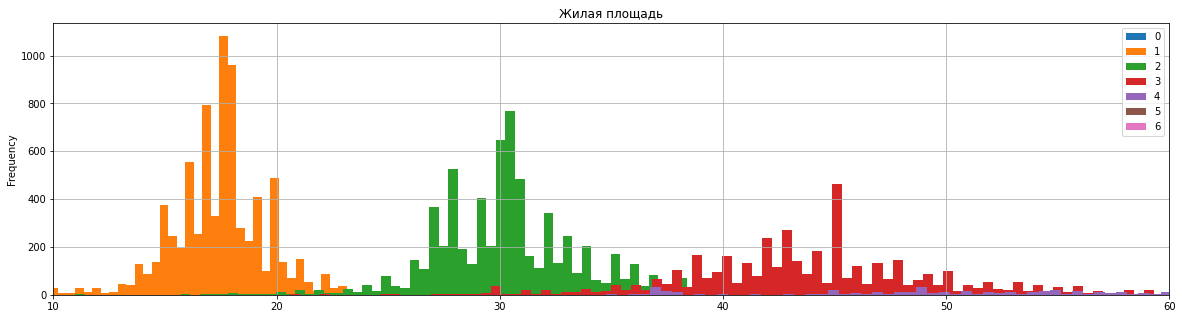

In [49]:
#исследуем данные в столбце living_area
data_cut['living_area'].groupby(data_cut['rooms']).plot(title='Жилая площадь', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=150, 
                                                        figsize=(20, 5), 
                                                        xlim=(10, 60), 
                                                        legend=True);

На общей гистограмме по жилой площади собраны графики по количеству комнат - от 0 до 6. Из них выделяются три - объекты с одной, двумя и тремя комнатами - их больше всего. Жилая площадь в однокомнатных квартирах в большинстве случаев - около 18 м2, в двухкомнатных - около 30 м2, а в трехкомнатных - около 45 м2.

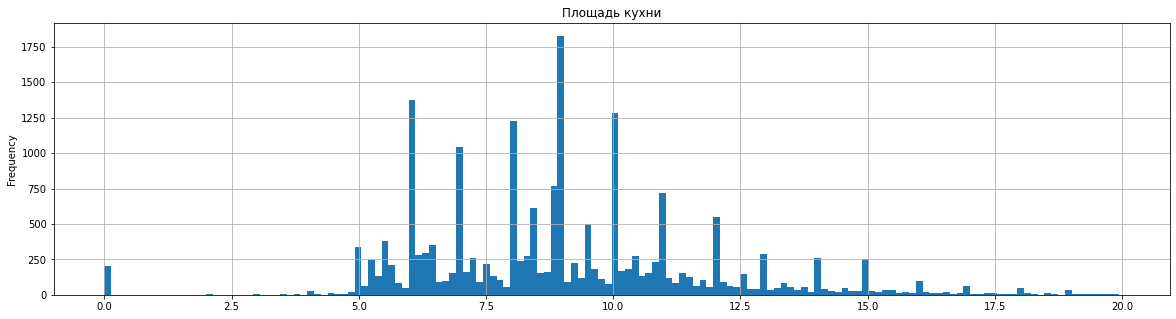

In [50]:
#исследуем данные в столбце kitchen_area
data_cut['kitchen_area'].plot(title='Площадь кухни', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=150, 
                                                        figsize=(20, 5));

На графике по площади кухни также прослеживается нормальное распределение. Видны пики на целочисленных значениях, максимальный - 9 м2.

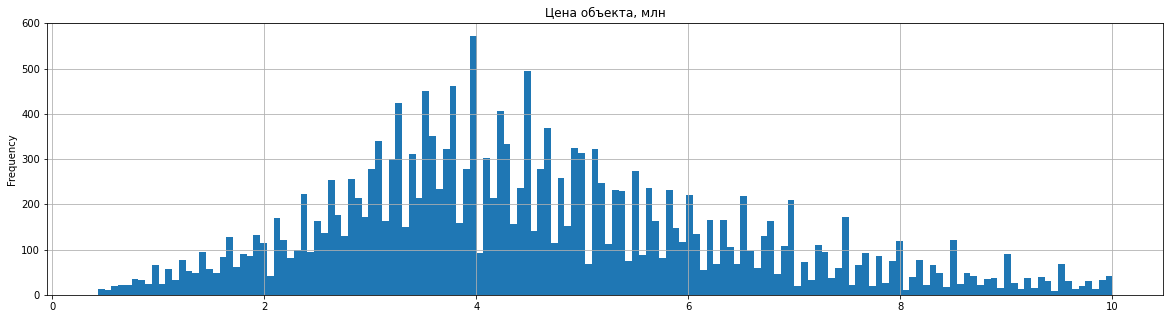

In [51]:
#исследуем данные в столбце last_price
data_cut['last_price'].plot(title='Цена объекта, млн', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=150, 
                                                        figsize=(20, 5));

График цены объекта отражает нормальное распределение, самая частая цена - около 4 млн.

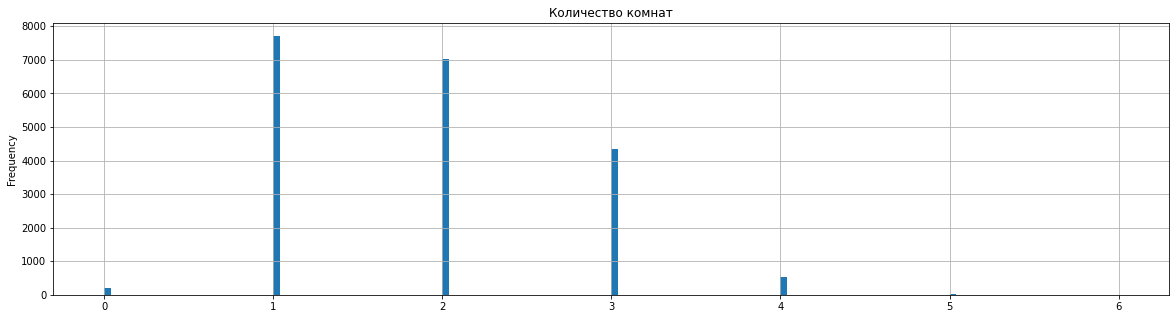

In [52]:
#исследуем данные в столбце rooms
data_cut['rooms'].plot(title='Количество комнат', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=150, 
                                                        figsize=(20, 5));

Как уже было видно на графике с жилой площадью, чаще всего встречаются объекты с одной, двумя и тремя комнатами. Из них однокомнатные на первом месте. 

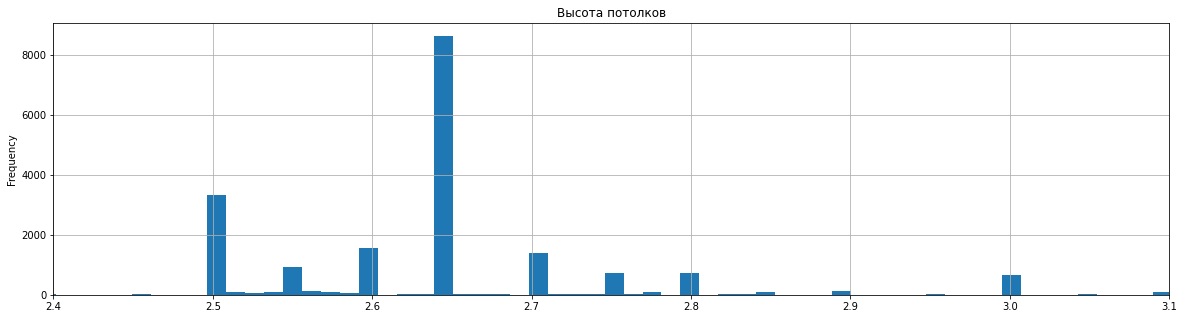

In [53]:
#исследуем данные в столбце ceiling_height
data_cut['ceiling_height'].plot(title='Высота потолков', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=150, 
                                                        xlim=(2.4, 3.1),
                                                        figsize=(20, 5));

На графике видно нормальное распределение с отдельными пиками на отметках 2.5 и 2.65.

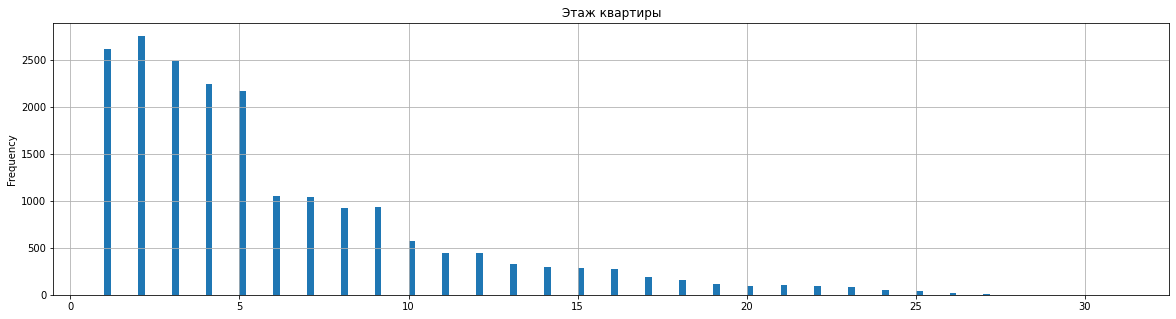

In [54]:
#исследуем данные в столбце floor
data_cut['floor'].plot(title='Этаж квартиры', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=150, 
                                                        figsize=(20, 5));

Здесь видно распределение Пуассона. Чаще всего встречаются квартиры на первых пяти этажах (лидирует 2 этаж). Чем выше - тем меньше объявлений.

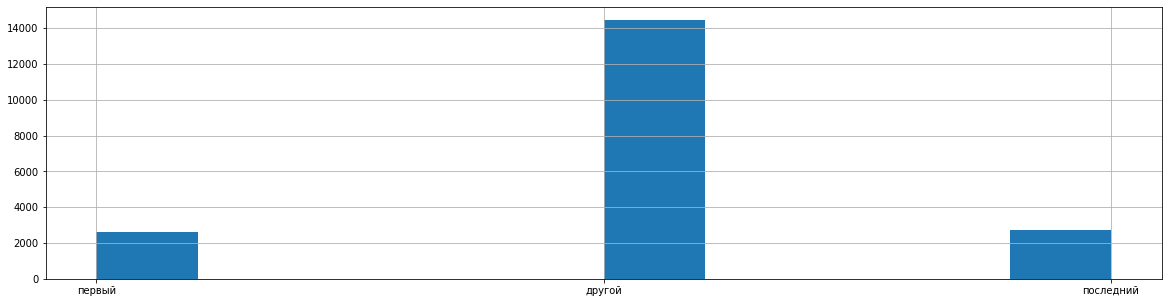

In [55]:
#исследуем данные в столбце floor_category
data_cut['floor_category'].hist(figsize=(20, 5));

Данные о типе квартиры также распределились нормально. Чаще всего встречаются объекты не  на первом или последнем этаже, а где-то между ними.

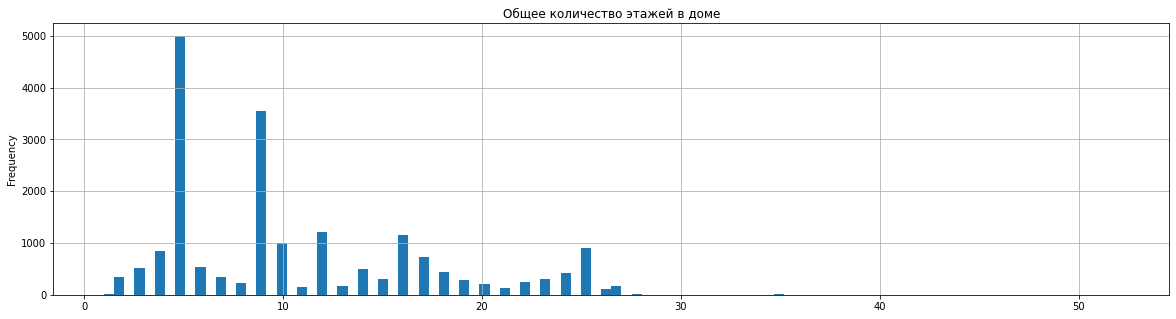

In [56]:
#исследуем данные в столбце floors_total
data_cut['floors_total'].plot(title='Общее количество этажей в доме', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=100, 
                                                        figsize=(20, 5));

Чаще всего встречаются квартиры в пятиэтажных и девятиэтажных домах. Также довольно много объявлений об объектах в 12 и 16 этажных зданиях.

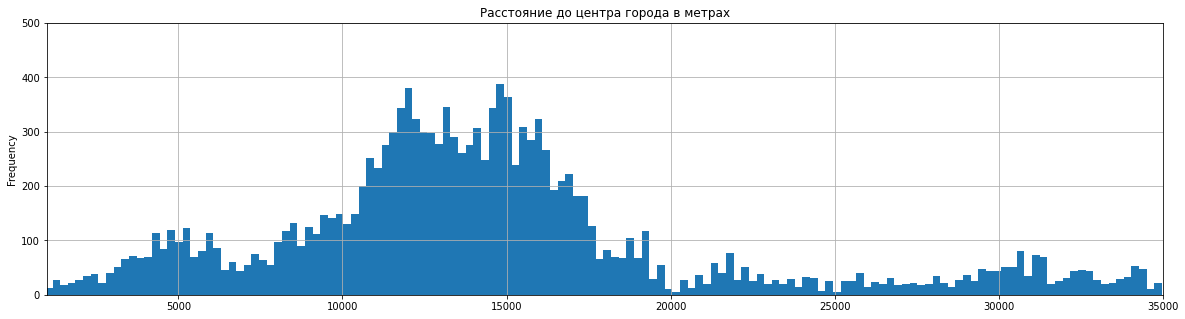

In [57]:
#исследуем данные в столбце city_centers_nearest
data_cut['city_centers_nearest'].plot(title='Расстояние до центра города в метрах', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=150, 
                                                        xlim=(1000, 35000),
                                                        ylim=(0, 500),
                                                        figsize=(20, 5));

На графике видно нормальное распределение. Основная масса объектов находится в 8-18 км от центра города.

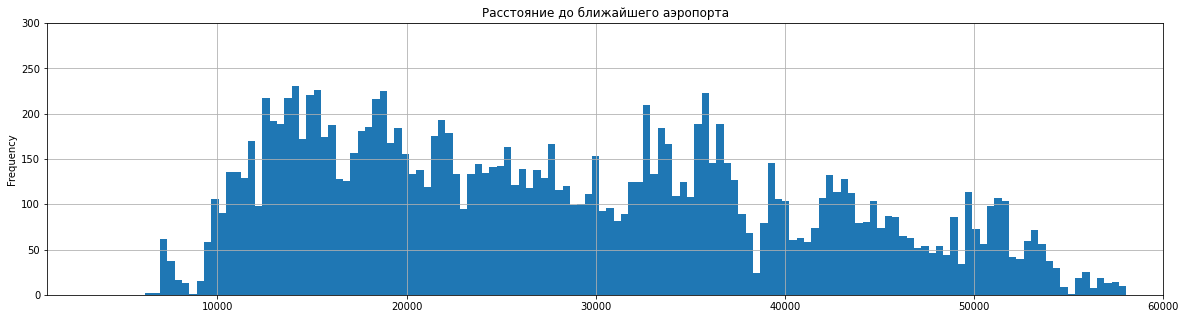

In [58]:
#исследуем данные в столбце airports_nearest
data_cut['airports_nearest'].plot(title='Расстояние до ближайшего аэропорта', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=150, 
                                                        xlim=(1000, 60000),
                                                        ylim=(0, 300),
                                                        figsize=(20, 5));

Здесь прослеживается нормальное распределение, но оно не ярко выражено, т.к. на графике нет сильных пиков.

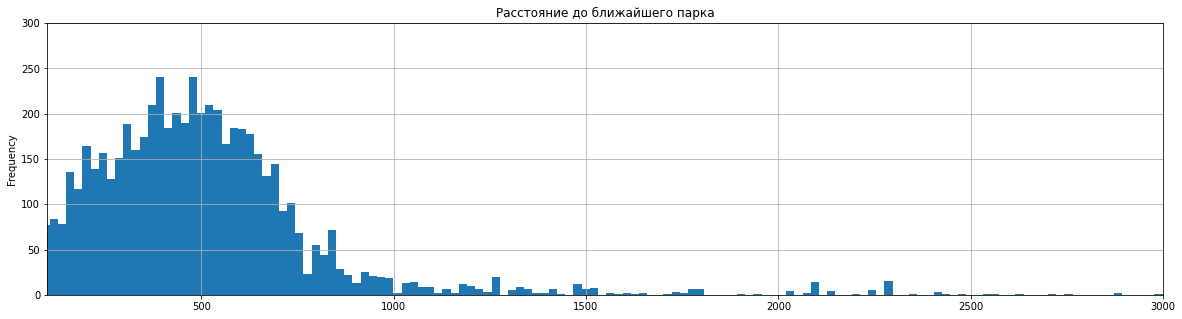

In [59]:
#исследуем данные в столбце parks_nearest
data_cut['parks_nearest'].plot(title='Расстояние до ближайшего парка', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=150, 
                                                        xlim=(100, 3000),
                                                        ylim=(0, 300),
                                                        figsize=(20, 5));

Среди тех объектов, рядом с которыми имеются парки, в большинстве случаев они расположены в радиусе одного километра.

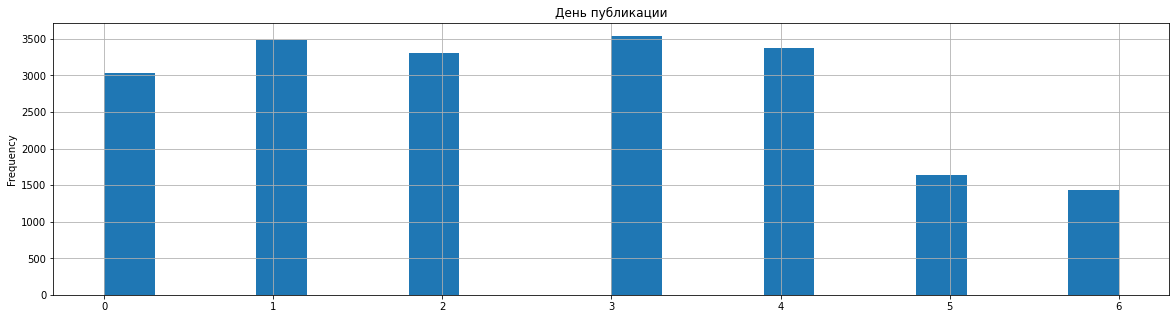

In [60]:
#исследуем данные в столбце week_day
data_cut['week_day'].plot(title='День публикации', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=20, 
                                                        figsize=(20, 5));

Объявления чаще публикуют по будням, на выходных заметен значительный спад в их количестве. Больше всего публкиаций сделано по четвергам.

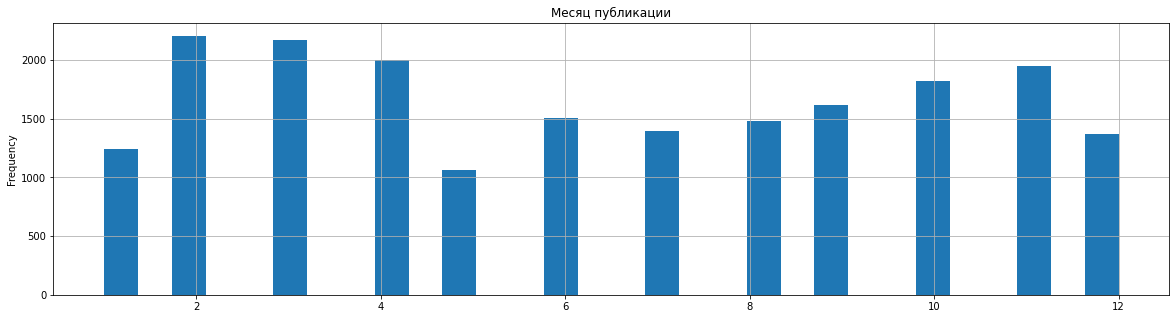

In [61]:
#исследуем данные в столбце month
data_cut['month'].plot(title='Месяц публикации', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=30, 
                                                        figsize=(20, 5));

Активнее всего занимаются продажей квартир в холодное время года - с октября по апрель с новогодним перерывом в декабре-январе. С мая по октябрь наступает сезон отпусков, а с ним снижается и количество публикаций.

#### Изучение скорости продажи объектов

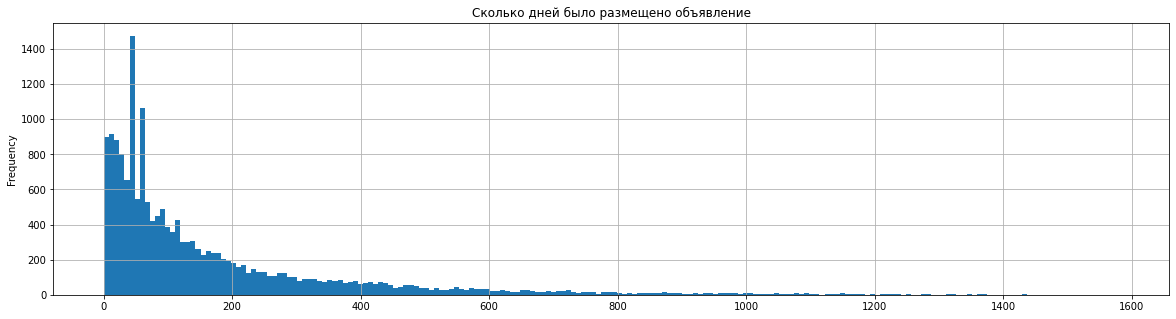

In [62]:
#исследуем данные в столбце days_exposition
data_cut['days_exposition'].plot(title='Сколько дней было размещено объявление', 
                                                        kind='hist', 
                                                        grid=True, 
                                                        bins=200, 
                                                        figsize=(20, 5));

In [63]:
#посчитаем среднее
data_cut['days_exposition'].mean()

168.37080450568928

In [64]:
#посчитаем медиану
data_cut['days_exposition'].median()

89.00000000000001

Медианное значение 89 означает, что обычно квартира продается в течение первых трех месяцев. Среднее значение почти в два раза больше, т.к. есть объявления, которые ждали своего часа год, два и больше. Эти продажи можно посчитать чрезвычайно долгими. Также присутствуют и "горячие пирожки" - квартиры с такими благоприятными условиями, что их приобретают через пару недель после публикации.

#### Факторы, влияющие на стоимость объекта

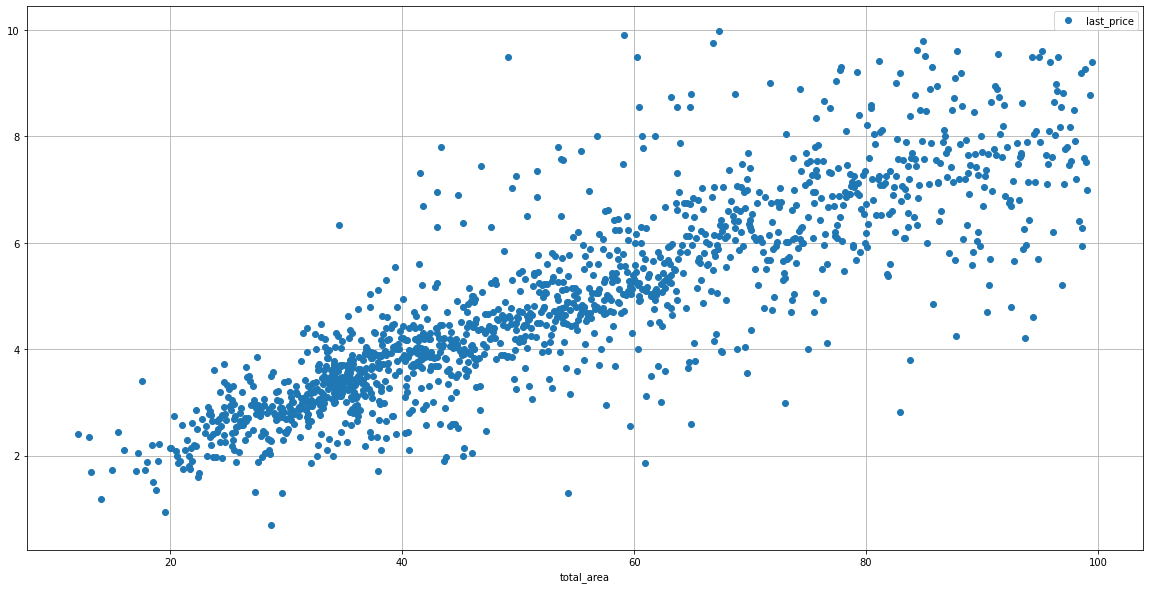

In [65]:
#изучим зависимость цены объекта от общей площади
(
data_cut
.pivot_table(index='total_area', values='last_price')
.plot(style='o', grid=True, figsize=(20, 10))
);

На графике видно, что с увеличением площади квартиры растет и ее стоимость. Редко встречаются объекты меньше 40 м2 и дороже 5 млн. То же и с обратной стороны - выбиваются объявления о квартирах больше 80 м2 и дешевле 6 млн. Основная масса объявлений содержит информацию об объектах от 30 до 60 м2 стоимостью от 2 до 6 млн.

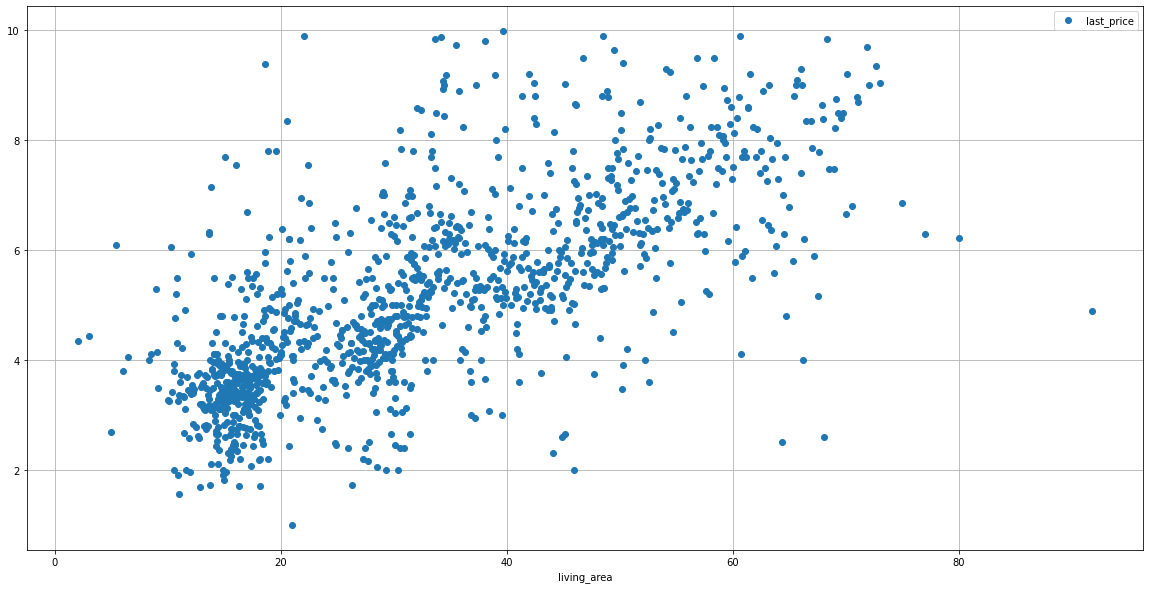

In [66]:
#изучим зависимость цены объекта от жилой площади
(
    data_cut
    .pivot_table(index='living_area', values='last_price')
    .plot(style='o', grid=True, figsize=(20, 10))
);

Размер жилой площади также влияет на стоимость - чем больше, тем дороже.

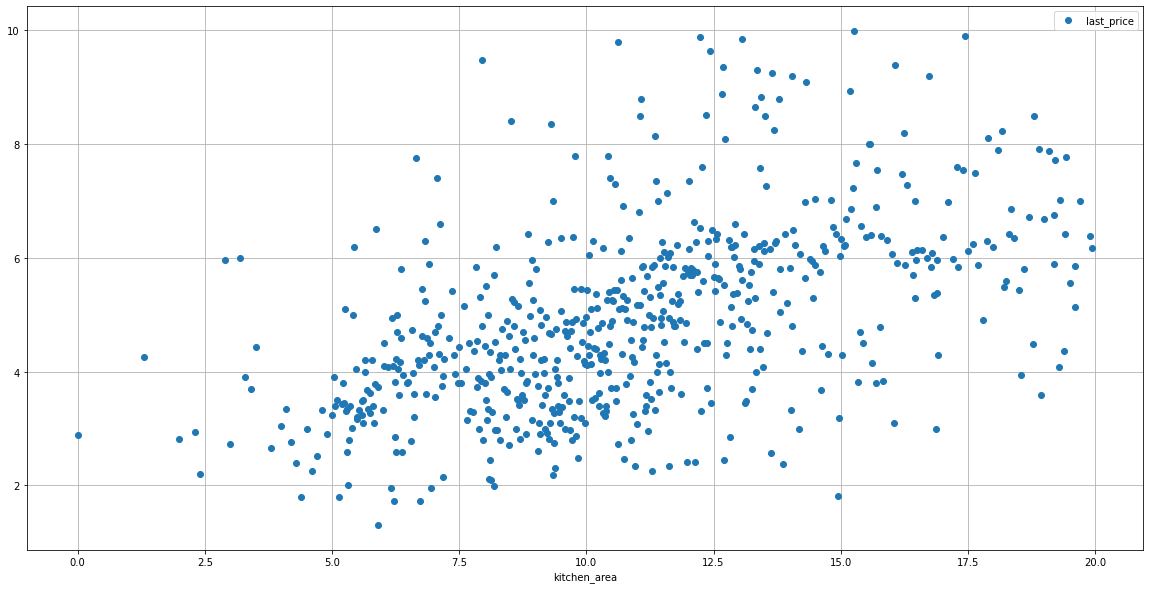

In [67]:
#изучим зависимость цены объекта от площади кухни
(
    data_cut
    .pivot_table(index='kitchen_area', values='last_price')
    .plot(style='o', grid=True, figsize=(20, 10))
);

Такое же направление имеет и зависимость цены от площади кухни - за простор надо платить.

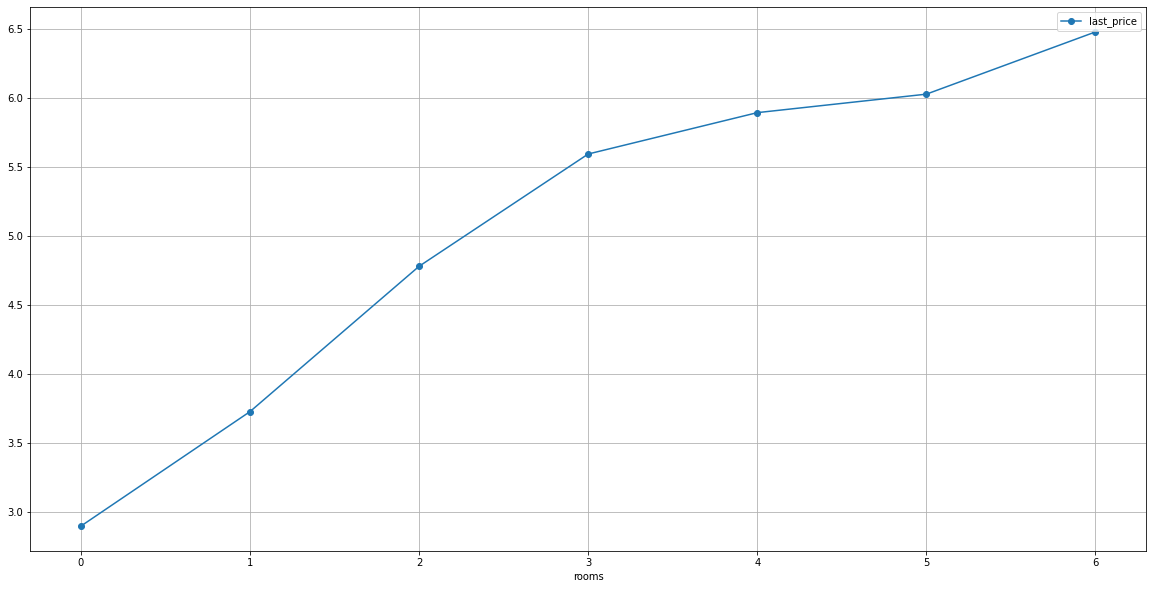

In [68]:
#изучим зависимость цены объекта от количества комнат
(
    data_cut
    .pivot_table(index='rooms', values='last_price')    
       .plot(style='o-', grid=True, figsize=(20, 10))
);

Количество комнат также меняет цену в сторону увеличения.

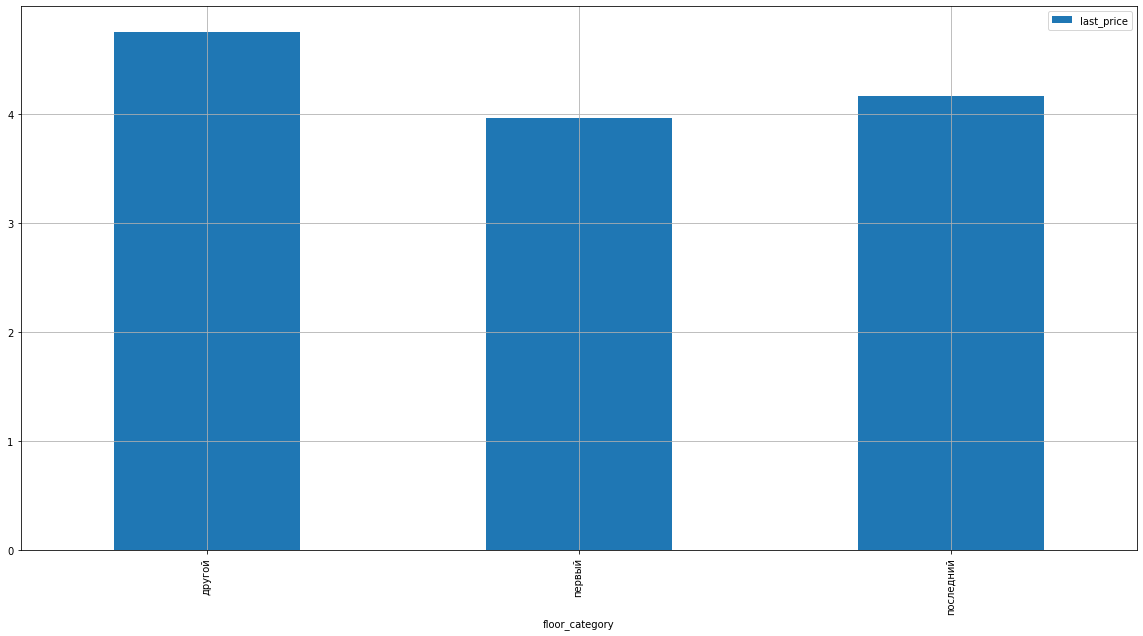

In [69]:
#изучим зависимость цены объекта от типа этажа, на котором расположена квартира (первый, последний, другой)
(
    data_cut
    .pivot_table(index='floor_category', values='last_price')    
       .plot(kind='bar', grid=True, figsize=(20, 10))
);

Квартиры на первом и последнем этажах стоят дешевле, чем "промежуточные".

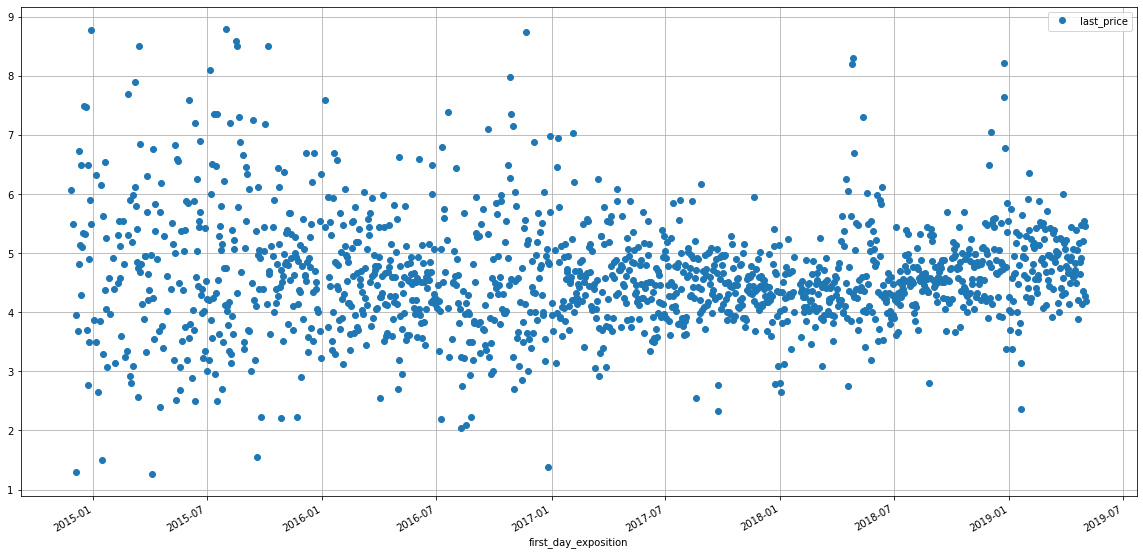

In [70]:
#изучим зависимость цены объекта от даты размещения
(
    data_cut
    .pivot_table(index='first_day_exposition', values='last_price')
    .plot(style='o', grid=True, figsize=(20, 10))
       );

На графике видно, как разброс цен сужается со временем. В 2015 году в равной степени встречались объявления о квартирах за 3, за 5 и за 7 млн, а начиная с 2017 года в основном в продаже были объекты за 4-5 млн.

#### Средняя цена одного квадратного метра

In [71]:
#посчитаем стоимость одного квадратного метра
data_cut['one_sqr_mtr_price'] = (data_cut['last_price']/data_cut['total_area']*1000000)

#сгруппируем данные по населенным пунктам и посчитаем среднюю цену
data_cut_top = data_cut.pivot_table(index='locality_name', 
                 values='one_sqr_mtr_price', 
                 aggfunc=['mean', 'count'])

data_cut_top.columns = ['m2_mean_price', 'ad_amount']

data_cut_top.sort_values(by='ad_amount', ascending=False).head(10)

,m2_mean_price,ad_amount
locality_name,,
Санкт-Петербург,104470.392168,12591
поселок Мурино,85652.120856,549
поселок Шушары,78736.180711,428
Всеволожск,66389.847367,379
Колпино,75212.387280,325
Пушкин,99895.294355,318
Гатчина,68571.799628,296
поселок Парголово,93056.199502,291
деревня Кудрово,92698.079215,282


Самая высокая средняя стоимость одного кв. метра, ожидаемо, в Санкт-Петербурге - почти 105 тыс., а самая низкая - в Выобрге, почти в два раза ниже - 58 тыс.

#### Средняя цена километра в СПб

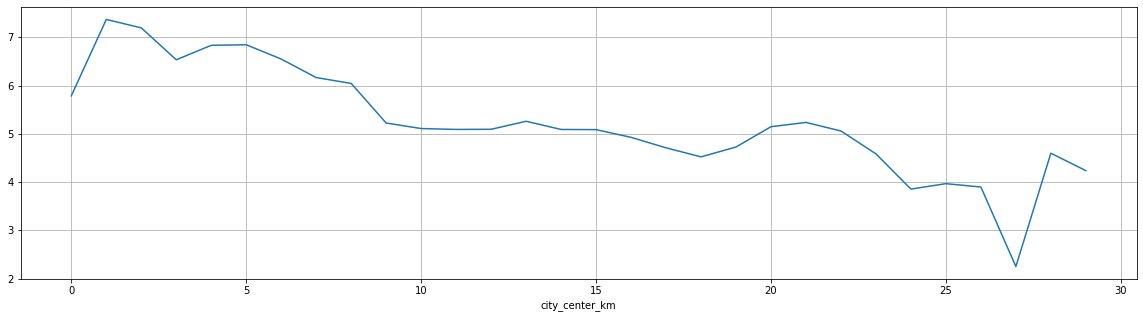

In [72]:
#выделим объекты в СПб, сгруппируем их по км до центра и посчитаем среднюю стоимость
(
    data_cut.query('locality_name == "Санкт-Петербург"')
    .groupby('city_center_km')['last_price'].mean()
    .plot(grid=True, figsize=(20, 5))
);

На графике видно, как с удалением от центра города снижается средняя стоимость. Так, в первых 7 км не найти квартиры дешевле 6 млн. А на расстоянии около 25 км от центра уже можно найти много вариантов за 4 млн и меньше.

### Общий вывод

В ходе исследования были изучен архив 23699 объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Была проверена взаимосвязь разных параметров объекта и его стоимости.

На этапе предоработки были обнаружены пропуски в большинстве столбцов. Некоторые из них были заполнены медианным значением, а в картографических данных заменены на "0". Был исправлен тип данных в колонке с датой публикации, удалены неявные дубликаты в столбце с названиями населенных пунктов.
Кроме того были выявлены и удалены редкие и выбивающиеся значения в столбцах, содержащих стоимость, общую площадь, высоту потолков, расстояния до аэропорта и центра города, площадь кухни.

В таблицу были добавдены столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

Во время исследовательского анализа были изучены основные параметры объектов. Были сделаны следующие выводы:
- В основной массе объявлений представлены объекты площадью от 30 до 60 м2.
- Жилая площадь в однокомнатных квартирах в большинстве случаев - около 18 м2, в двухкомнатных - около 30 м2, а в трехкомнатных - около 45 м2.
- Площадь кухни - то 6 до 10 м2.
- Больше всего объектов стоимостью около 4 млн.
- Чаще всего встречаются объекты с одной, двумя и тремя комнатами.
- Высота потолка в большинстве случаев - 2.65.
- Чаще всего встречаются квартиры на первых пяти этажах (лидирует 2 этаж) в пятиэтажных и девятиэтажных домах.
- Основная масса объектов находится в 8-18 км от центра города и в 10-40 км от аэропорта.
- Парки в большинстве случаев расположены в радиусе одного километра.
- Объявления чаще публикуют по будням и в холодное время года за исключением новогодних прздников.
Также была изучена скорость продажи объектов и факторы, влияющие на стоимсоть. Обычно квартира продается в течение первых трех месяцев. С увеличением площади квартиры растет и ее стоимость. Основная масса объявлений содержит информацию об объектах от 30 до 60 м2 стоимостью от 2 до 6 млн. Также влияют на стоимость размер жилой площади, площадь кухни, количество комнат. Чем больше - тем дороже. Квартиры на первом и последнем этажах стоят дешевле, чем "промежуточные". 
За прошедшие года разброс цен сильно сузился - в 2015 году в равной степени встречались объявления о квартирах за 3, за 5 и за 7 млн, а начиная с 2017 года в основном в продаже были объекты за 4-5 млн.

Самая высокая средняя стоимость одного кв. метра, ожидаемо, в Санкт-Петербурге - почти 105 тыс., а самая низкая - в Выобрге, почти в два раза ниже - 58 тыс. Внутри города стоимость объектов также различается и зависит от удаленности от центра. Так, в первых 7 км не найти квартиры дешевле 6 млн. А на расстоянии около 25 км от центра уже можно найти много вариантов за 4 млн и меньше.